In [1]:
import json
import os
import math
import librosa
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.models import load_model
import warnings


warnings.filterwarnings("ignore")


DATASET_PATH = "./TrainData"
DATA_PATH = "./data_train.json"
DATASET_PATH_TEST = "./TestData"
DATA_PATH_TEST = "./data_test.json"
SAMPLE_RATE = 22050 
TRACK_DURATION = 2 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION
NUM_MFCC=13 #Number of coefficients to extract
N_FFT=2048 #Interval considered to apply FFT. Measured in # of samples
HOP_LENGTH=512 #Sliding window for FFT. Measured in # of samples
NUM_SEGMENTS=3 #Number of segments we want to divide sample tracks into
SAMPLES_PER_SEGMENT = int(SAMPLES_PER_TRACK / NUM_SEGMENTS)
NUM_MFCC_VECTORS_PER_SEGMENT = math.ceil(SAMPLES_PER_SEGMENT / HOP_LENGTH) #rounding the expected mfcc number per segment

In [2]:
def save_mfcc(dataset_path, json_path):
    """Extracts MFCCs from music dataset and saves them into a json file along with labels.

        :param dataset_path (str): Path to dataset
        :param json_path (str): Path to json file used to save MFCCs
        :return:
        """

    # to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }
    label_number = 0
    # loop through all types of sounds in sub-folders (Put/grab/fault etc)
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure processing different category sounds sub-folder level
        if dirpath is not dataset_path:

            # save different sound label ( sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))
            # process all audio files in category sub-folder
            count = 0;
            for f in filenames:

		# load audio file
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
                is_file_segmented = False 
                start = SAMPLES_PER_SEGMENT # s=0 -> 0
                finish = start + SAMPLES_PER_SEGMENT # s=0 -> sample_per_segment
                # extract mfcc, want to analyze slice of the signal
                mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sample_rate, 
                             n_mfcc=NUM_MFCC, n_fft=N_FFT, hop_length=HOP_LENGTH)
                mfcc = mfcc.T

                # store only mfcc feature if it has expected number of vectors
                if len(mfcc) == NUM_MFCC_VECTORS_PER_SEGMENT:
                    data["mfcc"].append(mfcc.tolist()) #to save in JSON file
                    data["labels"].append(i-1)   #to ignore the first dataset path
                    print("{}".format(file_path))
                    is_file_segmented = True 
                if is_file_segmented:
                    count+=1
             
            print(semantic_label, label_number ,count)
            label_number+=1
    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)
        

In [3]:
save_mfcc(DATASET_PATH, DATA_PATH)


Processing: TrainData\Compressor
./TrainData\Compressor\Compressor (1).wav
./TrainData\Compressor\Compressor (10).wav
./TrainData\Compressor\Compressor (11).wav
./TrainData\Compressor\Compressor (12).wav
./TrainData\Compressor\Compressor (13).wav
./TrainData\Compressor\Compressor (14).wav
./TrainData\Compressor\Compressor (15).wav
./TrainData\Compressor\Compressor (16).wav
./TrainData\Compressor\Compressor (2).wav
./TrainData\Compressor\Compressor (3).wav
./TrainData\Compressor\Compressor (4).wav
./TrainData\Compressor\Compressor (5).wav
./TrainData\Compressor\Compressor (6).wav
./TrainData\Compressor\Compressor (7).wav
./TrainData\Compressor\Compressor (8).wav
./TrainData\Compressor\Compressor (9).wav
TrainData\Compressor 0 16

Processing: TrainData\Fault
./TrainData\Fault\Fault (1).wav
./TrainData\Fault\Fault (10).wav
./TrainData\Fault\Fault (11).wav
./TrainData\Fault\Fault (12).wav
./TrainData\Fault\Fault (13).wav
./TrainData\Fault\Fault (14).wav
./TrainData\Fault\Fault (15).wav
./

./TrainData\Grab-Compressor-Red\GrabCompRed (180).wav
./TrainData\Grab-Compressor-Red\GrabCompRed (181).wav
./TrainData\Grab-Compressor-Red\GrabCompRed (182).wav
./TrainData\Grab-Compressor-Red\GrabCompRed (183).wav
./TrainData\Grab-Compressor-Red\GrabCompRed (184).wav
./TrainData\Grab-Compressor-Red\GrabCompRed (19).wav
./TrainData\Grab-Compressor-Red\GrabCompRed (2).wav
./TrainData\Grab-Compressor-Red\GrabCompRed (20).wav
./TrainData\Grab-Compressor-Red\GrabCompRed (21).wav
./TrainData\Grab-Compressor-Red\GrabCompRed (22).wav
./TrainData\Grab-Compressor-Red\GrabCompRed (23).wav
./TrainData\Grab-Compressor-Red\GrabCompRed (24).wav
./TrainData\Grab-Compressor-Red\GrabCompRed (25).wav
./TrainData\Grab-Compressor-Red\GrabCompRed (26).wav
./TrainData\Grab-Compressor-Red\GrabCompRed (27).wav
./TrainData\Grab-Compressor-Red\GrabCompRed (28).wav
./TrainData\Grab-Compressor-Red\GrabCompRed (29).wav
./TrainData\Grab-Compressor-Red\GrabCompRed (3).wav
./TrainData\Grab-Compressor-Red\GrabCompRed

./TrainData\Grab-Compressor-Silver\GrabCompSilver (147).wav
./TrainData\Grab-Compressor-Silver\GrabCompSilver (148).wav
./TrainData\Grab-Compressor-Silver\GrabCompSilver (149).wav
./TrainData\Grab-Compressor-Silver\GrabCompSilver (15).wav
./TrainData\Grab-Compressor-Silver\GrabCompSilver (150).wav
./TrainData\Grab-Compressor-Silver\GrabCompSilver (151).wav
./TrainData\Grab-Compressor-Silver\GrabCompSilver (152).wav
./TrainData\Grab-Compressor-Silver\GrabCompSilver (153).wav
./TrainData\Grab-Compressor-Silver\GrabCompSilver (154).wav
./TrainData\Grab-Compressor-Silver\GrabCompSilver (155).wav
./TrainData\Grab-Compressor-Silver\GrabCompSilver (156).wav
./TrainData\Grab-Compressor-Silver\GrabCompSilver (157).wav
./TrainData\Grab-Compressor-Silver\GrabCompSilver (158).wav
./TrainData\Grab-Compressor-Silver\GrabCompSilver (159).wav
./TrainData\Grab-Compressor-Silver\GrabCompSilver (16).wav
./TrainData\Grab-Compressor-Silver\GrabCompSilver (160).wav
./TrainData\Grab-Compressor-Silver\GrabCom

./TrainData\Grab-Red\GrabRed (107).wav
./TrainData\Grab-Red\GrabRed (108).wav
./TrainData\Grab-Red\GrabRed (109).wav
./TrainData\Grab-Red\GrabRed (11).wav
./TrainData\Grab-Red\GrabRed (110).wav
./TrainData\Grab-Red\GrabRed (111).wav
./TrainData\Grab-Red\GrabRed (112).wav
./TrainData\Grab-Red\GrabRed (113).wav
./TrainData\Grab-Red\GrabRed (114).wav
./TrainData\Grab-Red\GrabRed (115).wav
./TrainData\Grab-Red\GrabRed (116).wav
./TrainData\Grab-Red\GrabRed (117).wav
./TrainData\Grab-Red\GrabRed (118).wav
./TrainData\Grab-Red\GrabRed (119).wav
./TrainData\Grab-Red\GrabRed (12).wav
./TrainData\Grab-Red\GrabRed (120).wav
./TrainData\Grab-Red\GrabRed (121).wav
./TrainData\Grab-Red\GrabRed (122).wav
./TrainData\Grab-Red\GrabRed (123).wav
./TrainData\Grab-Red\GrabRed (124).wav
./TrainData\Grab-Red\GrabRed (125).wav
./TrainData\Grab-Red\GrabRed (126).wav
./TrainData\Grab-Red\GrabRed (127).wav
./TrainData\Grab-Red\GrabRed (128).wav
./TrainData\Grab-Red\GrabRed (129).wav
./TrainData\Grab-Red\GrabRe

./TrainData\Grab-Silver\GrabSilver (12).wav
./TrainData\Grab-Silver\GrabSilver (120).wav
./TrainData\Grab-Silver\GrabSilver (121).wav
./TrainData\Grab-Silver\GrabSilver (122).wav
./TrainData\Grab-Silver\GrabSilver (123).wav
./TrainData\Grab-Silver\GrabSilver (124).wav
./TrainData\Grab-Silver\GrabSilver (125).wav
./TrainData\Grab-Silver\GrabSilver (126).wav
./TrainData\Grab-Silver\GrabSilver (127).wav
./TrainData\Grab-Silver\GrabSilver (128).wav
./TrainData\Grab-Silver\GrabSilver (129).wav
./TrainData\Grab-Silver\GrabSilver (13).wav
./TrainData\Grab-Silver\GrabSilver (130).wav
./TrainData\Grab-Silver\GrabSilver (131).wav
./TrainData\Grab-Silver\GrabSilver (132).wav
./TrainData\Grab-Silver\GrabSilver (133).wav
./TrainData\Grab-Silver\GrabSilver (134).wav
./TrainData\Grab-Silver\GrabSilver (135).wav
./TrainData\Grab-Silver\GrabSilver (136).wav
./TrainData\Grab-Silver\GrabSilver (137).wav
./TrainData\Grab-Silver\GrabSilver (138).wav
./TrainData\Grab-Silver\GrabSilver (139).wav
./TrainData\

./TrainData\Put-Compressor-Red\PutCompRed (110).wav
./TrainData\Put-Compressor-Red\PutCompRed (111).wav
./TrainData\Put-Compressor-Red\PutCompRed (112).wav
./TrainData\Put-Compressor-Red\PutCompRed (113).wav
./TrainData\Put-Compressor-Red\PutCompRed (114).wav
./TrainData\Put-Compressor-Red\PutCompRed (115).wav
./TrainData\Put-Compressor-Red\PutCompRed (116).wav
./TrainData\Put-Compressor-Red\PutCompRed (117).wav
./TrainData\Put-Compressor-Red\PutCompRed (118).wav
./TrainData\Put-Compressor-Red\PutCompRed (119).wav
./TrainData\Put-Compressor-Red\PutCompRed (12).wav
./TrainData\Put-Compressor-Red\PutCompRed (120).wav
./TrainData\Put-Compressor-Red\PutCompRed (121).wav
./TrainData\Put-Compressor-Red\PutCompRed (122).wav
./TrainData\Put-Compressor-Red\PutCompRed (123).wav
./TrainData\Put-Compressor-Red\PutCompRed (124).wav
./TrainData\Put-Compressor-Red\PutCompRed (125).wav
./TrainData\Put-Compressor-Red\PutCompRed (126).wav
./TrainData\Put-Compressor-Red\PutCompRed (127).wav
./TrainData\P

./TrainData\Put-Compressor-Red\PutCompRed (87).wav
./TrainData\Put-Compressor-Red\PutCompRed (88).wav
./TrainData\Put-Compressor-Red\PutCompRed (89).wav
./TrainData\Put-Compressor-Red\PutCompRed (9).wav
./TrainData\Put-Compressor-Red\PutCompRed (90).wav
./TrainData\Put-Compressor-Red\PutCompRed (91).wav
./TrainData\Put-Compressor-Red\PutCompRed (92).wav
./TrainData\Put-Compressor-Red\PutCompRed (93).wav
./TrainData\Put-Compressor-Red\PutCompRed (94).wav
./TrainData\Put-Compressor-Red\PutCompRed (95).wav
./TrainData\Put-Compressor-Red\PutCompRed (96).wav
./TrainData\Put-Compressor-Red\PutCompRed (97).wav
./TrainData\Put-Compressor-Red\PutCompRed (98).wav
./TrainData\Put-Compressor-Red\PutCompRed (99).wav
TrainData\Put-Compressor-Red 6 187

Processing: TrainData\Put-Compressor-Silver
./TrainData\Put-Compressor-Silver\PutCompSilver (1).wav
./TrainData\Put-Compressor-Silver\PutCompSilver (10).wav
./TrainData\Put-Compressor-Silver\PutCompSilver (100).wav
./TrainData\Put-Compressor-Silver\Pu

./TrainData\Put-Compressor-Silver\PutCompSilver (48).wav
./TrainData\Put-Compressor-Silver\PutCompSilver (49).wav
./TrainData\Put-Compressor-Silver\PutCompSilver (5).wav
./TrainData\Put-Compressor-Silver\PutCompSilver (50).wav
./TrainData\Put-Compressor-Silver\PutCompSilver (51).wav
./TrainData\Put-Compressor-Silver\PutCompSilver (52).wav
./TrainData\Put-Compressor-Silver\PutCompSilver (53).wav
./TrainData\Put-Compressor-Silver\PutCompSilver (54).wav
./TrainData\Put-Compressor-Silver\PutCompSilver (55).wav
./TrainData\Put-Compressor-Silver\PutCompSilver (56).wav
./TrainData\Put-Compressor-Silver\PutCompSilver (57).wav
./TrainData\Put-Compressor-Silver\PutCompSilver (58).wav
./TrainData\Put-Compressor-Silver\PutCompSilver (59).wav
./TrainData\Put-Compressor-Silver\PutCompSilver (6).wav
./TrainData\Put-Compressor-Silver\PutCompSilver (60).wav
./TrainData\Put-Compressor-Silver\PutCompSilver (61).wav
./TrainData\Put-Compressor-Silver\PutCompSilver (62).wav
./TrainData\Put-Compressor-Silver

./TrainData\Put-Red\PutRed (52).wav
./TrainData\Put-Red\PutRed (53).wav
./TrainData\Put-Red\PutRed (54).wav
./TrainData\Put-Red\PutRed (55).wav
./TrainData\Put-Red\PutRed (56).wav
./TrainData\Put-Red\PutRed (57).wav
./TrainData\Put-Red\PutRed (58).wav
./TrainData\Put-Red\PutRed (59).wav
./TrainData\Put-Red\PutRed (6).wav
./TrainData\Put-Red\PutRed (60).wav
./TrainData\Put-Red\PutRed (61).wav
./TrainData\Put-Red\PutRed (62).wav
./TrainData\Put-Red\PutRed (63).wav
./TrainData\Put-Red\PutRed (64).wav
./TrainData\Put-Red\PutRed (65).wav
./TrainData\Put-Red\PutRed (66).wav
./TrainData\Put-Red\PutRed (67).wav
./TrainData\Put-Red\PutRed (68).wav
./TrainData\Put-Red\PutRed (69).wav
./TrainData\Put-Red\PutRed (7).wav
./TrainData\Put-Red\PutRed (70).wav
./TrainData\Put-Red\PutRed (71).wav
./TrainData\Put-Red\PutRed (72).wav
./TrainData\Put-Red\PutRed (73).wav
./TrainData\Put-Red\PutRed (74).wav
./TrainData\Put-Red\PutRed (75).wav
./TrainData\Put-Red\PutRed (76).wav
./TrainData\Put-Red\PutRed (77

./TrainData\Put-Silver\PutSilver (64).wav
./TrainData\Put-Silver\PutSilver (65).wav
./TrainData\Put-Silver\PutSilver (66).wav
./TrainData\Put-Silver\PutSilver (67).wav
./TrainData\Put-Silver\PutSilver (68).wav
./TrainData\Put-Silver\PutSilver (69).wav
./TrainData\Put-Silver\PutSilver (7).wav
./TrainData\Put-Silver\PutSilver (70).wav
./TrainData\Put-Silver\PutSilver (71).wav
./TrainData\Put-Silver\PutSilver (72).wav
./TrainData\Put-Silver\PutSilver (73).wav
./TrainData\Put-Silver\PutSilver (74).wav
./TrainData\Put-Silver\PutSilver (75).wav
./TrainData\Put-Silver\PutSilver (76).wav
./TrainData\Put-Silver\PutSilver (77).wav
./TrainData\Put-Silver\PutSilver (78).wav
./TrainData\Put-Silver\PutSilver (79).wav
./TrainData\Put-Silver\PutSilver (8).wav
./TrainData\Put-Silver\PutSilver (80).wav
./TrainData\Put-Silver\PutSilver (81).wav
./TrainData\Put-Silver\PutSilver (82).wav
./TrainData\Put-Silver\PutSilver (83).wav
./TrainData\Put-Silver\PutSilver (84).wav
./TrainData\Put-Silver\PutSilver (85

In [4]:
save_mfcc(DATASET_PATH_TEST, DATA_PATH_TEST)


Processing: TestData\Compressor
./TestData\Compressor\Compressor1 (1).wav
./TestData\Compressor\Compressor1 (2).wav
./TestData\Compressor\Compressor1 (3).wav
TestData\Compressor 0 3

Processing: TestData\Fault
./TestData\Fault\Fault (1).wav
./TestData\Fault\Fault (10).wav
./TestData\Fault\Fault (11).wav
./TestData\Fault\Fault (12).wav
./TestData\Fault\Fault (13).wav
./TestData\Fault\Fault (2).wav
./TestData\Fault\Fault (3).wav
./TestData\Fault\Fault (4).wav
./TestData\Fault\Fault (5).wav
./TestData\Fault\Fault (6).wav
./TestData\Fault\Fault (7).wav
./TestData\Fault\Fault (8).wav
./TestData\Fault\Fault (9).wav
TestData\Fault 1 13

Processing: TestData\Grab-Compressor-Red
./TestData\Grab-Compressor-Red\GrabCompRed (1).wav
./TestData\Grab-Compressor-Red\GrabCompRed (10).wav
./TestData\Grab-Compressor-Red\GrabCompRed (11).wav
./TestData\Grab-Compressor-Red\GrabCompRed (12).wav
./TestData\Grab-Compressor-Red\GrabCompRed (13).wav
./TestData\Grab-Compressor-Red\GrabCompRed (14).wav
./TestDat

./TestData\Put-Red\PutRed (29).wav
./TestData\Put-Red\PutRed (3).wav
./TestData\Put-Red\PutRed (30).wav
./TestData\Put-Red\PutRed (31).wav
./TestData\Put-Red\PutRed (32).wav
./TestData\Put-Red\PutRed (4).wav
./TestData\Put-Red\PutRed (5).wav
./TestData\Put-Red\PutRed (6).wav
./TestData\Put-Red\PutRed (7).wav
./TestData\Put-Red\PutRed (8).wav
./TestData\Put-Red\PutRed (9).wav
TestData\Put-Red 8 32

Processing: TestData\Put-Silver
./TestData\Put-Silver\PutSilver (1).wav
./TestData\Put-Silver\PutSilver (10).wav
./TestData\Put-Silver\PutSilver (14).wav
./TestData\Put-Silver\PutSilver (17).wav
./TestData\Put-Silver\PutSilver (2).wav
./TestData\Put-Silver\PutSilver (3).wav
./TestData\Put-Silver\PutSilver (4).wav
./TestData\Put-Silver\PutSilver (5).wav
./TestData\Put-Silver\PutSilver (6).wav
./TestData\Put-Silver\PutSilver (7).wav
./TestData\Put-Silver\PutSilver (8).wav
./TestData\Put-Silver\PutSilver (9).wav
TestData\Put-Silver 9 12


In [5]:
def load_data(data_path):
    """Loads training dataset from json file.
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
        :return mappings
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y, data["mapping"]

In [6]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

In [7]:
def prepare_datasets(test_size):
    """Loads data and splits it into train, validation and test sets.
    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target test set
    """

    # load data
    X, y , mappings= load_data(DATA_PATH)

    # create train/test split
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=test_size,random_state=42)

    # add an extra axis to input sets for 3d array
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]

    return X_train, X_validation, y_train, y_validation, mappings

In [8]:
def prepare_datasets_test():
    """Loads sample data
    :return S (ndarray): Input training set
    :return s (ndarray): Target training set
    """

    # load data
    X_test, y_test , mappings= load_data(DATA_PATH_TEST)

    # add an extra axis to input sets for 3d array
    X_test = X_test[..., np.newaxis]

    return X_test,y_test

In [9]:
def match_prediction(model, X, y, mappings):
    """Predict a single sample using the trained model
    :param model: Trained classifier
    :param X: Input data
    :param y (int): Target
    """

    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X,verbose=0)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)
    print("Target: {}, Predicted label: {}".format(mappings[y], mappings[predicted_index[0]]))

In [10]:
def build_model(input_shape):
    """Generates CNN model
    :param input_shape: Shape of input set
    :return model: CNN model
    """

    # build CNN topology
    model = keras.Sequential()

    # 1st convolution layer
    model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 2nd convolution layer
    model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 3rd convolution layer
    model.add(keras.layers.Conv2D(128, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(100, activation='relu'))
    model.add(keras.layers.Dropout(0.5)) #to avoid overfitting

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

In [11]:
def predict(model, X, mappings):
    """Predict a single sample using the trained model
    :param model: Trained classifier
    :param X: Input data
    :param y (int): Target
    """

    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X,verbose=0)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)
    return mappings[predicted_index[0]]

In [12]:
def load_sound_and_predict(file_path, model):
    """Extracts MFCCs from music and predict
        :param dataset_path (str): Path to dataset
        :return soundtype:
        """
    sounddata = []
    
    signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
    
    total_sample = 0;
    # process mid segments of audio file
    start = SAMPLES_PER_SEGMENT
    finish = start + SAMPLES_PER_SEGMENT
    # extract mfcc
    mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sample_rate, n_mfcc=NUM_MFCC, n_fft=N_FFT, hop_length=HOP_LENGTH)
    mfcc = mfcc.T
    if len(mfcc) == NUM_MFCC_VECTORS_PER_SEGMENT:
        sounddata.append(mfcc.tolist())
        sounddata = np.array(sounddata)
        sounddata = sounddata[..., np.newaxis]
        return predict(model,sounddata[0],mappings);   
    return ''    

In [13]:
def load_sound_folder_and_predict(dataset_path, model):
    """predict from dataset

        :param dataset_path (str): Path to dataset
        """
    # loop through all types of sounds in sub-folders (Put/grab/fault etc)
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        # ensure processing different category sounds sub-folder level
        for f in filenames:
            file_path = os.path.join(dataset_path, f)
            print(file_path)
            print("Target: {}, Predicted label: {}".format(file_path, load_sound_and_predict(file_path,model)))

In [14]:
# get train, validation, test splits
X_train, X_validation, y_train, y_validation, mappings = prepare_datasets(0.25)

# create network
input_shape = (X_train.shape[1], X_train.shape[2], 1)
print(input_shape)
model = build_model(input_shape)

# compile model
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# train model
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)



(29, 13, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 11, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 6, 128)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 6, 128)       512       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 4, 128)        147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 2, 128)        0         
 2D)                                                             
                                            

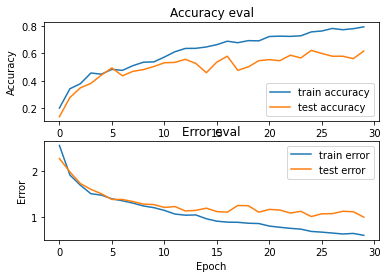

13/13 - 0s - loss: 0.9974 - accuracy: 0.6175 - 96ms/epoch - 7ms/step

Validation accuracy: 0.6175000071525574


In [15]:
# plot accuracy/error for training and validation
plot_history(history)

# evaluate model on test set
validation_loss, validation_acc= model.evaluate(X_validation, y_validation, verbose=2)
print('\nValidation accuracy:', validation_acc)

In [16]:
print('VALIDATION DATA ACCURACY DETAILS')
y_pred = model.predict(X_validation, batch_size=64, verbose=1)
y_pred_class = np.argmax(y_pred, axis=1)
print(classification_report(y_validation, y_pred_class))
print(confusion_matrix(y_validation,y_pred_class))

print('TRAIN DATA ACCURACY DETAILS')
y_pred = model.predict(X_train, batch_size=64, verbose=1)
y_pred_class = np.argmax(y_pred, axis=1)
print(classification_report(y_train, y_pred_class))
print(confusion_matrix(y_train,y_pred_class))

VALIDATION DATA ACCURACY DETAILS
7/7 [==============================] - 0s 11ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.64      0.35      0.45        20
           2       0.57      0.91      0.70        46
           3       0.78      0.50      0.61        50
           4       0.63      0.84      0.72        51
           5       0.76      0.53      0.62        47
           6       0.66      0.61      0.64        44
           7       0.56      0.45      0.50        53
           8       0.54      0.69      0.61        48
           9       0.56      0.50      0.53        40

    accuracy                           0.62       400
   macro avg       0.67      0.64      0.64       400
weighted avg       0.63      0.62      0.61       400

[[ 1  0  0  0  0  0  0  0  0  0]
 [ 0  7  0  1  0  1  0  6  2  3]
 [ 0  0 42  0  1  1  0  2  0  0]
 [ 0  0 20 25  0  1  1  3  0  0]
 [ 0  0  0  0 43  4  0  

In [17]:
X_test, y_test = prepare_datasets_test()

In [18]:
print('TEST ACCURACY DETAILS')
y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_class = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_class))
print(confusion_matrix(y_test,y_pred_class))

TEST ACCURACY DETAILS
4/4 [==============================] - 0s 11ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.73      0.62      0.67        13
           2       0.64      0.67      0.65        27
           3       0.46      0.50      0.48        12
           4       0.81      0.85      0.83        34
           5       0.62      0.50      0.56        20
           6       0.86      0.61      0.72        31
           7       0.39      0.92      0.55        12
           8       0.86      0.75      0.80        32
           9       0.57      0.67      0.62        12

    accuracy                           0.68       196
   macro avg       0.59      0.61      0.59       196
weighted avg       0.70      0.68      0.68       196

[[ 0  0  3  0  0  0  0  0  0  0]
 [ 0  8  1  0  0  0  1  2  0  1]
 [ 0  0 18  4  1  1  1  2  0  0]
 [ 0  0  2  6  0  1  0  3  0  0]
 [ 0  1  0  0 29  4  0  0  0  0]
 [

In [19]:
# pick a sample to predict from the test set
X_to_predict = X_validation[50]
y_to_predict = y_validation[50]

# predict sample
match_prediction(model, X_to_predict, y_to_predict, mappings)

Target: TrainData\Grab-Compressor-Silver, Predicted label: TrainData\Put-Compressor-Silver


In [20]:
load_sound_and_predict('./TrainData\Compressor\Compressor (1).wav',model)

'TrainData\\Compressor'

In [21]:
load_sound_folder_and_predict('./Classification', model)

./Classification\01-PutSilver.wav
Target: ./Classification\01-PutSilver.wav, Predicted label: TrainData\Put-Red
./Classification\02-GrabRed.wav
Target: ./Classification\02-GrabRed.wav, Predicted label: TrainData\Grab-Red
./Classification\03-PutRed.wav
Target: ./Classification\03-PutRed.wav, Predicted label: TrainData\Put-Silver
./Classification\04-GrabRed.wav
Target: ./Classification\04-GrabRed.wav, Predicted label: TrainData\Grab-Red
./Classification\05-PutCompRed.wav
Target: ./Classification\05-PutCompRed.wav, Predicted label: TrainData\Put-Compressor-Silver
./Classification\06-GrabCompRed.wav
Target: ./Classification\06-GrabCompRed.wav, Predicted label: TrainData\Grab-Compressor-Red
./Classification\100-PutCompRed.wav
Target: ./Classification\100-PutCompRed.wav, Predicted label: TrainData\Put-Compressor-Red
./Classification\101-GrabRed.wav
Target: ./Classification\101-GrabRed.wav, Predicted label: TrainData\Grab-Red
./Classification\102-PutRed.wav
Target: ./Classification\102-PutRed

Target: ./Classification\80-PutCompRed.wav, Predicted label: TrainData\Grab-Compressor-Red
./Classification\81-GrabCompRed.wav
Target: ./Classification\81-GrabCompRed.wav, Predicted label: TrainData\Grab-Compressor-Red
./Classification\82-PutCompRed.wav
Target: ./Classification\82-PutCompRed.wav, Predicted label: TrainData\Put-Compressor-Red
./Classification\83-Fault.wav
Target: ./Classification\83-Fault.wav, Predicted label: TrainData\Fault
./Classification\84-GrabRed.wav
Target: ./Classification\84-GrabRed.wav, Predicted label: TrainData\Grab-Red
./Classification\85-PutRed.wav
Target: ./Classification\85-PutRed.wav, Predicted label: TrainData\Put-Red
./Classification\86-GrabCompRed.wav
Target: ./Classification\86-GrabCompRed.wav, Predicted label: TrainData\Put-Compressor-Silver
./Classification\87-PutCompRed.wav
Target: ./Classification\87-PutCompRed.wav, Predicted label: TrainData\Put-Compressor-Red
./Classification\88-GrabCompRed.wav
Target: ./Classification\88-GrabCompRed.wav, Pre

In [22]:
model.save("sound_classify_model.h5")

In [23]:
with open(DATA_PATH, "r") as fp:
    data = json.load(fp)
mappings= data["mapping"]
save_model= load_model("sound_classify_model.h5")
load_sound_folder_and_predict('./Classification', save_model)

./Classification\01-PutSilver.wav
Target: ./Classification\01-PutSilver.wav, Predicted label: TrainData\Put-Red
./Classification\02-GrabRed.wav
Target: ./Classification\02-GrabRed.wav, Predicted label: TrainData\Grab-Red
./Classification\03-PutRed.wav
Target: ./Classification\03-PutRed.wav, Predicted label: TrainData\Put-Silver
./Classification\04-GrabRed.wav
Target: ./Classification\04-GrabRed.wav, Predicted label: TrainData\Grab-Red
./Classification\05-PutCompRed.wav
Target: ./Classification\05-PutCompRed.wav, Predicted label: TrainData\Put-Compressor-Silver
./Classification\06-GrabCompRed.wav
Target: ./Classification\06-GrabCompRed.wav, Predicted label: TrainData\Grab-Compressor-Red
./Classification\100-PutCompRed.wav
Target: ./Classification\100-PutCompRed.wav, Predicted label: TrainData\Put-Compressor-Red
./Classification\101-GrabRed.wav
Target: ./Classification\101-GrabRed.wav, Predicted label: TrainData\Grab-Red
./Classification\102-PutRed.wav
Target: ./Classification\102-PutRed

Target: ./Classification\80-PutCompRed.wav, Predicted label: TrainData\Grab-Compressor-Red
./Classification\81-GrabCompRed.wav
Target: ./Classification\81-GrabCompRed.wav, Predicted label: TrainData\Grab-Compressor-Red
./Classification\82-PutCompRed.wav
Target: ./Classification\82-PutCompRed.wav, Predicted label: TrainData\Put-Compressor-Red
./Classification\83-Fault.wav
Target: ./Classification\83-Fault.wav, Predicted label: TrainData\Fault
./Classification\84-GrabRed.wav
Target: ./Classification\84-GrabRed.wav, Predicted label: TrainData\Grab-Red
./Classification\85-PutRed.wav
Target: ./Classification\85-PutRed.wav, Predicted label: TrainData\Put-Red
./Classification\86-GrabCompRed.wav
Target: ./Classification\86-GrabCompRed.wav, Predicted label: TrainData\Put-Compressor-Silver
./Classification\87-PutCompRed.wav
Target: ./Classification\87-PutCompRed.wav, Predicted label: TrainData\Put-Compressor-Red
./Classification\88-GrabCompRed.wav
Target: ./Classification\88-GrabCompRed.wav, Pre